In [4]:
# función para calcular métricas desde archivo de validación
def validar_data(df):
    """
    Args:
        df (DataFrame): Contiene la información de las predicciones y los "true labels"
        
    Returns:
        pro_img (tensor): Retorna la imagen procesada como tensor lista para la predicción.
    """
    
    import numpy as np
    from sklearn.metrics import confusion_matrix
    import matplotlib.pyplot as plt
    import seaborn as sns
    
    # cambiar tipo de datos del df
    df = df.astype({'paquete_em': 'float64', 'etiqueta_em': 'float64', 'domicilio_em': 'float64', 'rostro_em': 'float64'})
    df = df.astype({'paquete': 'float64', 'etiqueta': 'float64', 'n° domicilio': 'float64', 'rostro': 'float64'})

    # obtener "true labels"
    paquete_tl = df[['paquete_em']].to_numpy()
    etiqueta_tl = df[['etiqueta_em']].to_numpy()
    numeracion_tl = df[['domicilio_em']].to_numpy()
    rostro_tl = df[['rostro_em']].to_numpy()
    y_true = np.concatenate((paquete_tl, etiqueta_tl, numeracion_tl, rostro_tl), axis=1)
    # obtener predicciones
    paquete_p = df[['paquete']].to_numpy()
    etiqueta_p = df[['etiqueta']].to_numpy()
    numeracion_p = df[['n° domicilio']].to_numpy()
    rostro_p = df[['rostro']].to_numpy()
    y_pred = np.concatenate((paquete_p, etiqueta_p, numeracion_p, rostro_p), axis=1)
    
    labels = ["paquete", "etiqueta", "numeración", "rostro"]
    
    conf_mat_dict={}
    
    for label_col in range(len(labels)):
        y_true_label = y_true[:,label_col]
        y_pred_label = y_pred[:,label_col]
        conf_mat_dict[labels[label_col]] = confusion_matrix(y_pred=y_pred_label, y_true=y_true_label)
    
    
    for label, matrix in conf_mat_dict.items():
        accuracy = (matrix[0][0]+matrix[1][1])/(matrix[0][0] + matrix[0][1] + matrix[1][0]+matrix[1][1])
        recall = matrix[1][1]/(matrix[1][1]+matrix[1][0])
        precision = matrix[1][1]/(matrix[1][1]+matrix[0][1])
        F1 = 2*recall*precision/(recall + precision)
        print('accuracy:', accuracy, 'recall:', recall, 'precision:', precision, 'F1:', F1)
        ax = sns.heatmap(matrix/np.sum(matrix), annot=True, 
                fmt='.2%', cmap='Blues')
    
        ax.set_title("Matriz de confusión para {}".format(label));
        ax.set_xlabel('\nValor predicho')
        ax.set_ylabel('Valor real');
    
        ax.xaxis.set_ticklabels(['Nada', label])
        ax.yaxis.set_ticklabels(['Nada', label])
    
        plt.show()

# Recorrer todos los archivos de validación

In [8]:
import os
import pandas as pd

directorio = 'C:\\Users\\ext_fantmiraudal\\Desktop\\Segunda validación proyecto de imagenes\\validacion2'

listdir = os.listdir(directorio)

# Generar tabla 

# nombre de columnas
#columns_names = ['fecha','SOC', 'url', 'paquete', 's_paquete', 'etiqueta',
#                                  's_etiqueta_producto', 'n° domicilio','s_numero_domicilio',
#                                  'rostro', 's_rostro', 'paquete_em',
#                                  'etiqueta_em','domicilio_em', 'rostro_em']

columns_names = ['SOC', 'url', 'paquete', 's_paquete', 'etiqueta',
                                  's_etiqueta_producto', 'n° domicilio','s_numero_domicilio',
                                  'rostro', 's_rostro', 'paquete_em',
                                  'etiqueta_em','domicilio_em', 'rostro_em']

df_base = pd.DataFrame(columns = columns_names)
for file_name in listdir:
    # Importar excel
    excel_file = pd.read_excel(directorio+ '\\' + file_name)
    #excel_file.columns = columns_names
    excel_file = excel_file[columns_names]
    df_base = pd.concat([df_base, excel_file], axis=0)

print(df_full.shape)
# eliminar filas en que alguna columna presente un NaN
df_full = df_base.dropna()
print(df_full.shape)
# convertir fecha a tipo "datetime"
#df_full['fecha_as_date'] = pd.to_datetime(df_full['fecha'])
#df_full['fecha'] = pd.to_datetime(df_full['fecha'])

#Descargar df_base como excel
# se especifica nombre del archivo
#xlsx_name = 'C:\\Users\\ext_fantmiraudal\\Desktop\\Segunda validación proyecto de imagenes\\archivo_unificado\\full_file2.xlsx'
  
#guardar excel
#df_full.to_excel(xlsx_name)
#print('Archivo excel se exportó correctamente')

(778, 14)
(778, 14)


In [4]:
# verificar que existan 15 columnas
print(df_full.shape)

(778, 14)


In [13]:
df_full['fecha_as_date'].min()

KeyError: 'fecha_as_date'

In [246]:
df_full['fecha_as_date'].max()

Timestamp('2022-10-12 22:12:31')

In [247]:
# filtro de fecha
fecha_ini='2022-09-24 00:00:00'
fecha_fin='2022-10-12 23:00:00'
date_filter = (df_full['fecha_as_date'] > fecha_ini) & (df_full['fecha_as_date'] <= fecha_fin)

In [248]:
filtered_df=df_full.loc[date_filter]

In [249]:
filtered_df.shape

(3091, 16)

In [8]:
# cargar excel (tercera validación)
import pandas as pd
local_df = pd.read_excel('C:\\Users\\ext_fantmiraudal\\Desktop\\Tercera validación proyecto de imagenes\\validacion3.xlsx')

accuracy: 0.713 recall: 0.12852664576802508 precision: 0.82 F1: 0.22222222222222224


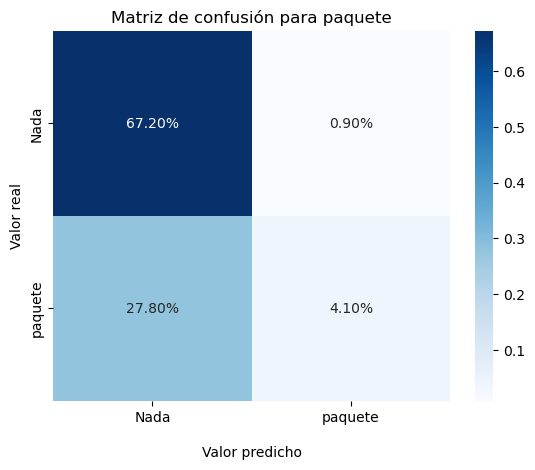

accuracy: 0.956 recall: 0.9045936395759717 precision: 0.9377289377289377 F1: 0.920863309352518


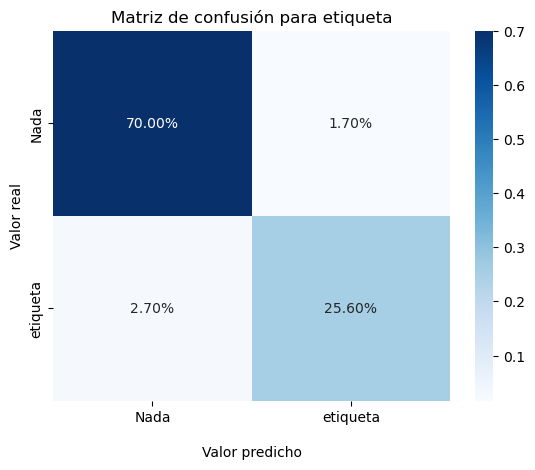

accuracy: 0.945 recall: 0.6638655462184874 precision: 0.8404255319148937 F1: 0.7417840375586855


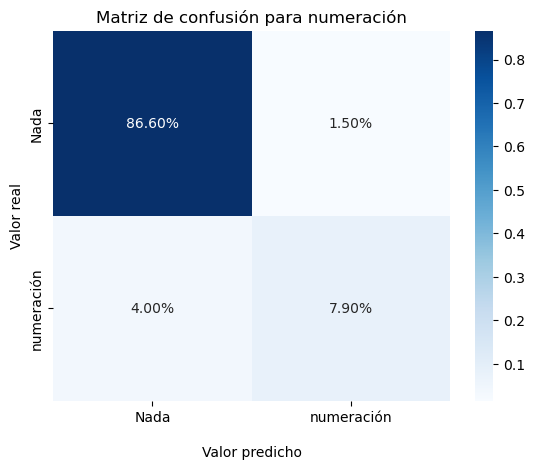

accuracy: 0.986 recall: 0.9615384615384616 precision: 0.872093023255814 F1: 0.9146341463414634


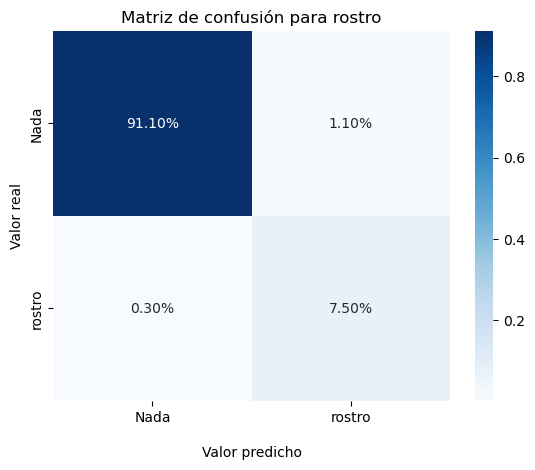

In [9]:
validar_data(local_df)

In [251]:
# cargar excel (segunda validación)
local_df = pd.read_excel('C:\\Users\\ext_fantmiraudal\\Desktop\\full_tablas_validacion\\full_file1.xlsx')

accuracy: 0.9203084832904884 recall: 0.9751131221719457 precision: 0.8941908713692946 F1: 0.9329004329004329


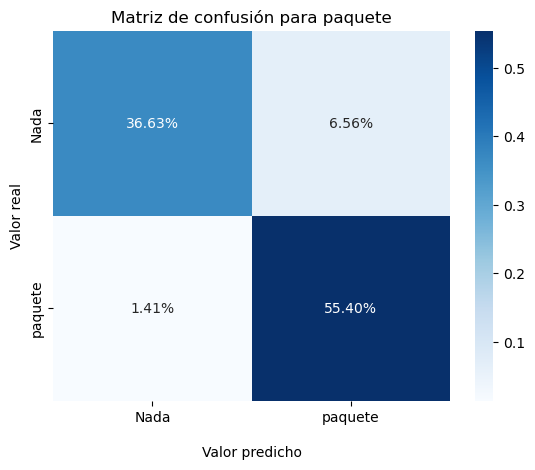

accuracy: 0.8946015424164524 recall: 0.9057971014492754 precision: 0.8971291866028708 F1: 0.9014423076923076


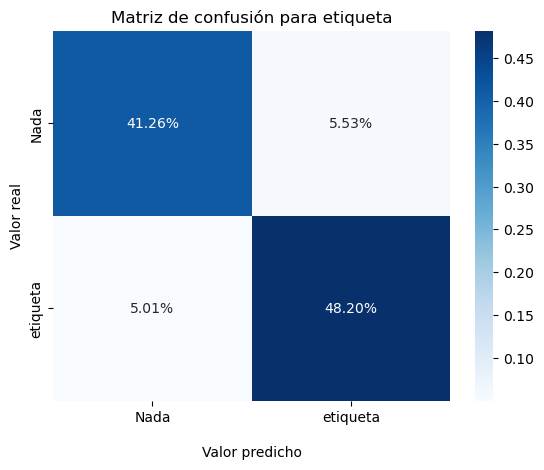

accuracy: 0.8676092544987146 recall: 0.5089820359281437 precision: 0.8018867924528302 F1: 0.6227106227106227


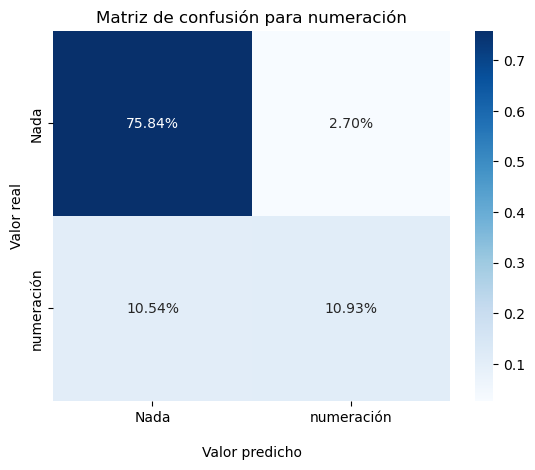

accuracy: 0.9691516709511568 recall: 0.9076923076923077 precision: 0.7662337662337663 F1: 0.8309859154929577


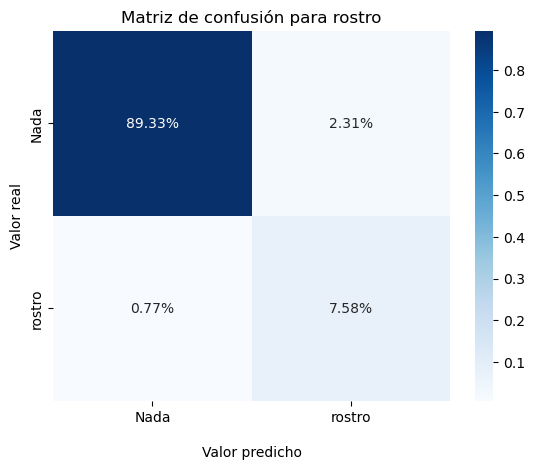

In [5]:
validar_data(df_full)

In [10]:
# cargar excel
local_df = pd.read_excel('C:\\Users\\ext_fantmiraudal\\Desktop\\Segunda validación proyecto de imagenes\\archivo_unificado\\full_file_bla_corregido.xlsx')

accuracy: 0.9203084832904884 recall: 0.9751131221719457 precision: 0.8941908713692946 F1: 0.9329004329004329


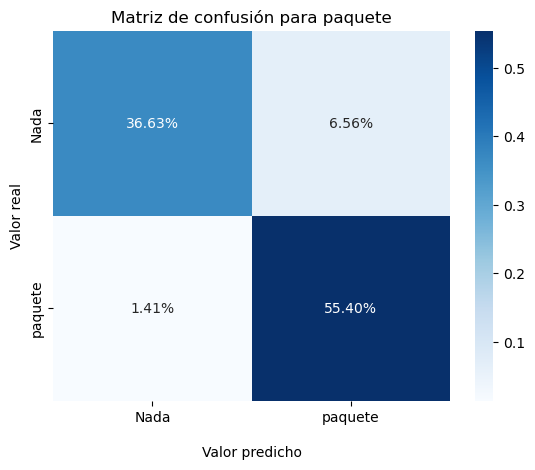

accuracy: 0.8946015424164524 recall: 0.9057971014492754 precision: 0.8971291866028708 F1: 0.9014423076923076


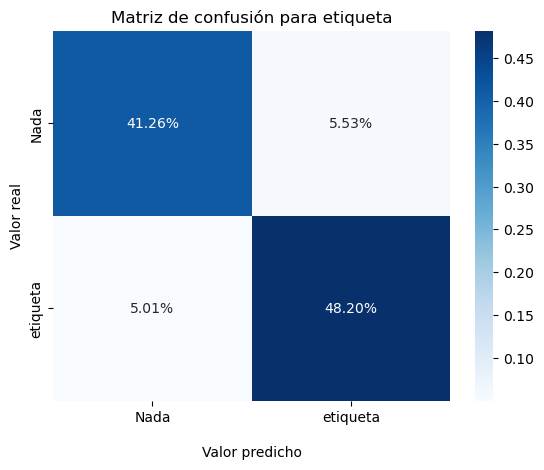

accuracy: 0.9203084832904884 recall: 0.7037037037037037 precision: 0.7169811320754716 F1: 0.7102803738317758


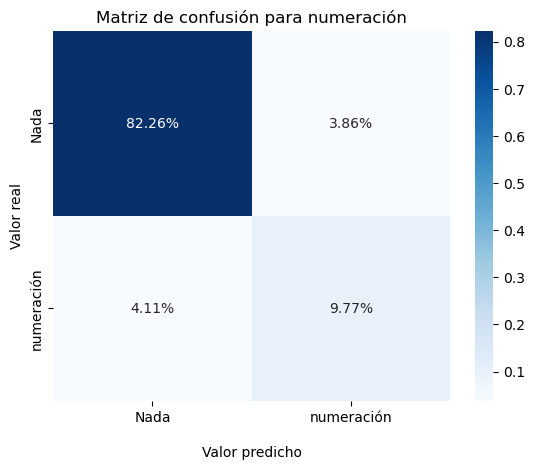

accuracy: 0.9768637532133676 recall: 0.9154929577464789 precision: 0.8441558441558441 F1: 0.8783783783783784


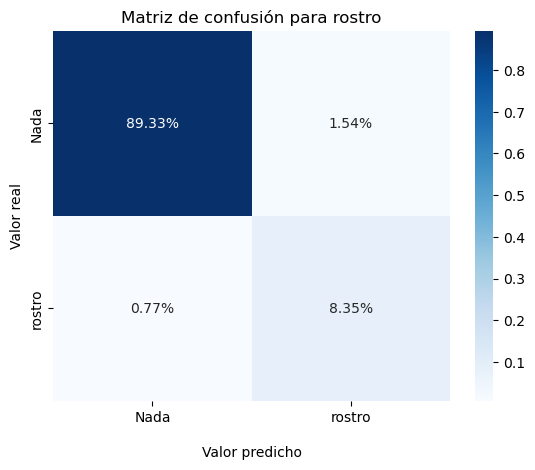

In [11]:
validar_data(local_df)

In [253]:
# cargar excel (primera validación)
local_df = pd.read_excel('C:\\Users\\ext_fantmiraudal\\Desktop\\full_tablas_validacion\\full_file1_arreglo_domicilio.xlsx')

accuracy: 0.9410698096101541 recall: 0.9835191468734852 precision: 0.9548235294117647 F1: 0.9689589302769818


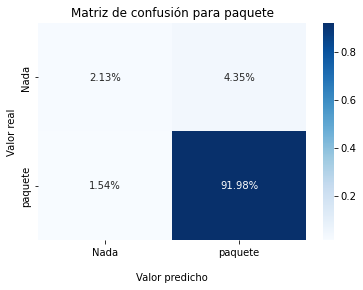

accuracy: 0.8880326382592928 recall: 0.941345600920069 precision: 0.9186307519640853 F1: 0.9298494745810848


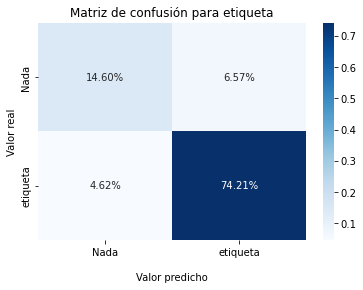

accuracy: 0.9315503173164098 recall: 0.7733990147783252 precision: 0.5992366412213741 F1: 0.6752688172043011


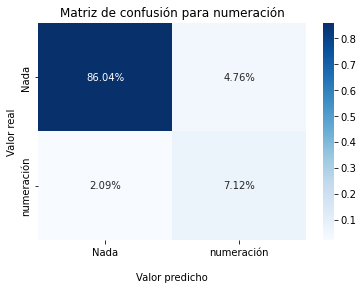

accuracy: 0.9338168631006346 recall: 0.8867924528301887 precision: 0.7193877551020408 F1: 0.7943661971830985


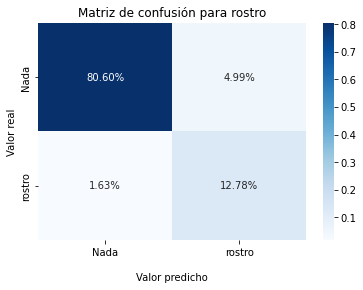

In [254]:
validar_data(local_df)

#### Unificar archivos

In [179]:
import os
import pandas as pd

directorio = 'C:\\Users\\ext_fantmiraudal\\Desktop\\Validaciones\\Archivos separados'

listdir = os.listdir(directorio)

# Generar tabla 

# nombre de columnas
#columns_names = ['fecha','SOC', 'url', 'paquete', 's_paquete', 'etiqueta',
#                                  's_etiqueta_producto', 'n° domicilio','s_numero_domicilio',
#                                  'rostro', 's_rostro', 'paquete_em',
#                                  'etiqueta_em','domicilio_em', 'rostro_em']

columns_names = ['SOC', 'url', 'paquete', 's_paquete', 'etiqueta',
                                  's_etiqueta_producto', 'n° domicilio','s_numero_domicilio',
                                  'rostro', 's_rostro', 'paquete_em',
                                  'etiqueta_em','domicilio_em', 'rostro_em']

df_base = pd.DataFrame(columns = columns_names)
for file_name in listdir:
    # Importar excel
    excel_file = pd.read_excel(directorio+ '\\' + file_name)
    print(excel_file.shape)
    #excel_file.columns = columns_names
    excel_file = excel_file[columns_names]
    df_base = pd.concat([df_base, excel_file], axis=0)

print(df_base.shape)

(3091, 17)
(778, 15)
(1000, 16)
(1000, 16)
(1000, 17)
(6869, 14)


In [180]:
df_base.head()

,SOC,url,paquete,s_paquete,etiqueta,s_etiqueta_producto,n° domicilio,s_numero_domicilio,rostro,s_rostro,paquete_em,etiqueta_em,domicilio_em,rostro_em
0,149074156582,https://prdadessacorptrl.blob.core.windows.net...,1,0.998147,1,1.0,0,0.029496,0,0.033564,1,1,0,0
1,149074300399,https://prdadessacorptrl.blob.core.windows.net...,1,0.999182,1,1.0,0,0.002921,0,0.009751,1,1,0,0
2,149074648733,https://prdadessacorptrl.blob.core.windows.net...,1,0.999537,1,1.0,0,0.016846,0,0.003495,1,1,0,0
3,149074065215,https://prdadessacorptrl.blob.core.windows.net...,1,0.998835,1,1.0,0,0.002414,0,0.257590,1,1,0,0
4,149074652569,https://prdadessacorptrl.blob.core.windows.net...,1,0.999258,1,1.0,0,0.034037,0,0.005084,1,1,0,0


In [181]:
df_copy = df_base.copy()

In [182]:
df_copy.shape

(6869, 14)

#### Filtrar por negras

In [183]:
df_base_sn = df_copy.loc[(df_copy.paquete != 0.0) & (df_copy.s_etiqueta_producto != 0.0255739632993936) & \
                         (df_copy.s_rostro != 0.0452637076377868) & (df_copy.s_numero_domicilio != 0.1568333506584167)]

In [184]:
df_base_sn2 = df_base_sn.groupby("SOC").first()

In [185]:
df_base_sn2.shape

(4595, 13)

In [186]:
random = df_base_sn2

In [187]:
random.head()

,url,paquete,s_paquete,etiqueta,s_etiqueta_producto,n° domicilio,s_numero_domicilio,rostro,s_rostro,paquete_em,etiqueta_em,domicilio_em,rostro_em
SOC,,,,,,,,,,,,,
336536884,https://prdadessacorptrl.blob.core.windows.net...,1,0.997316,1,0.999701,0,0.026303,0,0.010124,0.0,0,0,0
336553850,https://prdadessacorptrl.blob.core.windows.net...,1,0.998646,0,0.027288,0,0.005994,0,0.029559,1.0,0,0,0
336588470,https://prdadessacorptrl.blob.core.windows.net...,1,0.998215,1,0.999925,0,0.023635,0,0.008164,0.0,0,0,0
2030257538,https://prdadessacorptrl.blob.core.windows.net...,1,0.992211,1,1.000000,0,0.025705,0,0.014727,1.0,1,0,0
2030536046,https://prdadessacorptrl.blob.core.windows.net...,1,0.998411,0,0.016590,0,0.269287,1,0.995996,1.0,0,0,1


#### Ver balance de clases

In [188]:
random_0000 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 0)]
random_0001 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 1)]
random_0010 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 0)]
random_0011 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 1)]
random_0100 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 0)]
random_0101 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 1)]
random_0110 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 0)]
random_0111 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 1)]
random_1000 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 0)]
random_1001 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 1)]
random_1010 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 0)]
random_1011 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 1)]
random_1100 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 0)]
random_1101 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 1)]
random_1110 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 0)]
random_1111 = random[(random['paquete_em']== 1) & (random['etiqueta_em']== 1) & \
                     (random['rostro_em'] == 1) & (random['domicilio_em'] == 1)]
print('0000 = ', random_0000.shape)
print('0001 = ', random_0001.shape)
print('0010 = ', random_0010.shape)
print('0011 = ', random_0011.shape)
print('0100 = ', random_0100.shape)
print('0101 = ', random_0101.shape)
print('0110 = ', random_0110.shape)
print('0111 = ', random_0111.shape)
print('1000 = ', random_1000.shape)
print('1001 = ', random_1001.shape)
print('1010 = ', random_1010.shape)
print('1011 = ', random_1011.shape)
print('1100 = ', random_1100.shape)
print('1101 = ', random_1101.shape)
print('1110 = ', random_1110.shape)
print('1111 = ', random_1111.shape)

0000 =  (146, 13)
0001 =  (68, 13)
0010 =  (15, 13)
0011 =  (3, 13)
0100 =  (169, 13)
0101 =  (1, 13)
0110 =  (4, 13)
0111 =  (0, 13)
1000 =  (346, 13)
1001 =  (47, 13)
1010 =  (120, 13)
1011 =  (21, 13)
1100 =  (2663, 13)
1101 =  (509, 13)
1110 =  (382, 13)
1111 =  (98, 13)


In [189]:
df_full = pd.concat([random_0000, random_0001, random_0010, random_0011, random_0100, random_0101,\
                     random_0110, random_0111,random_1000, random_1001, random_1010, random_1011, \
                     random_1100.sample(n=1071), random_1101, random_1110, random_1111])               

In [190]:
random = df_full

In [191]:
random_0000 = random[(random['paquete_em']== 0) & (random['etiqueta_em']== 0) & \
                     (random['rostro_em'] == 0) & (random['domicilio_em'] == 0)]
random_XXX1 = random[(random['domicilio_em'] == 1)]
random_XX1X = random[(random['rostro_em'] == 1)]
random_X1XX = random[(random['etiqueta_em']== 1)]
random_1XXX = random[(random['paquete_em']== 1)]

In [192]:
print('0000 = ', random_0000.shape)
print('XXX1 = ', random_XXX1.shape)
print('XX1X = ', random_XX1X.shape)
print('X1XX = ', random_X1XX.shape)
print('1XXX = ', random_1XXX.shape)

0000 =  (146, 13)
XXX1 =  (747, 13)
XX1X =  (643, 13)
X1XX =  (2234, 13)
1XXX =  (2594, 13)


In [193]:
random.shape

(3000, 13)

In [194]:
random['error'] = ""

In [195]:
random = random.sample(frac = 1)

In [196]:
xlsx_name = 'C:\\Users\\ext_fantmiraudal\\Desktop\\revision_validacion.xlsx'
  
#guardar excel
random.to_excel(xlsx_name)